In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

In [2]:
input_file = "/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/APC_integration_downsample0.5_forMilo_ok.h5ad"
adata = sc.read_h5ad(input_file)

In [3]:
adata = adata.raw.to_adata()
adata.X.max()

8.8309965

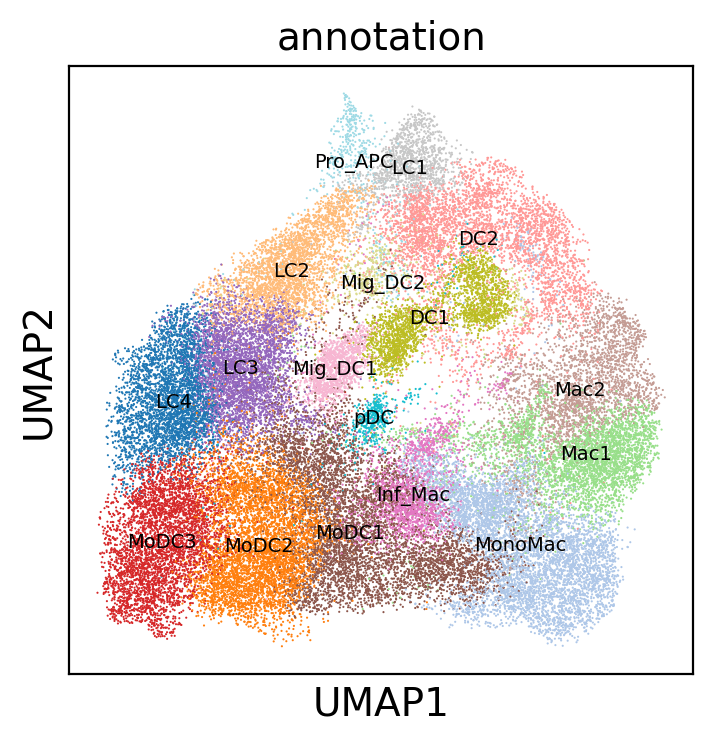

In [4]:
sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color=['annotation'], palette='tab20', legend_loc='on data',legend_fontsize=7, legend_fontweight='medium')

In [5]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30


/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/numba/core/typed_passes.py:327: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../.

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


In [6]:
adata.obs['Condition'] = "a_Other"
ctcl = adata.obs['integrated_sample_id'] == 'CTCL'
adata.obs.loc[ctcl, 'Condition'] = 'CTCL'

In [7]:
adata.obs['Condition'].unique

<bound method Series.unique of AGGGAGTTCCACTGGG-1-SKN8090552-AD           a_Other
ACGGAGAAGCTGCCCA-1-SKN8090540-AD           a_Other
CATATGGTCGGCGGTT-9-CTCL                       CTCL
TTGCCGTCATGCATGT-9-CTCL                       CTCL
AACTCAGGTGTCCTCT-1-18-CTCL                    CTCL
                                            ...   
ACGCCGAGTCTGCGGT-1-SKN8090588-Psoriasis    a_Other
GACCAATGTATAGTAG-1-SKN8105199-Healthy      a_Other
ACACTGACATACTACG-1-35-CTCL                    CTCL
CGGGTCAAGTGGTAAT-1-29-CTCL                    CTCL
TGAAAGAAGCAACGGT-1-SKN8105195-Healthy      a_Other
Name: Condition, Length: 50764, dtype: object>

In [8]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging

In [9]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [10]:
anndata2ri.activate()

In [11]:
%load_ext rpy2.ipython

In [12]:
%%R
library(miloR)
library(igraph)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)

In [13]:
adata_no_knn = adata.copy()
adata_no_knn.obsp = None
adata_no_knn.uns.pop("neighbors")

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 10, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'n_pcs': 30}, 'rp_forest': {'hyperplanes': {'start': array([     0,  18015,  36050,  54069,  72310,  90601, 108688, 126717,
       144834, 163003, 181114, 199181, 217454, 235525, 253594, 271799]), 'data': array([[ 3.331057  , -6.571208  ,  0.20266604, ...,  1.2099781 ,
        -1.0411726 , -3.4681115 ],
       [18.130556  ,  3.7740746 ,  8.199516  , ..., -0.25649607,
        -0.89563286, -1.2444761 ],
       [ 0.21519375,  0.3691883 , -2.4216805 , ..., -1.5163629 ,
        -0.61611485,  0.24463496],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.      

In [14]:
%%R -i adata_no_knn
adata_no_knn

class: SingleCellExperiment 
dim: 33538 50764 
metadata(19): LR_pre_post_colors LR_pre_pre_colors ...
  previous_anno_colors umap
assays(1): X
rownames(33538): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(578): gene_ids.SKN8090524.AD feature_types.SKN8090524.AD
  ... gene_ids.4820STDY7389014.Psoriasis
  feature_types.4820STDY7389014.Psoriasis
colnames(50764): AGGGAGTTCCACTGGG-1-SKN8090552-AD
  ACGGAGAAGCTGCCCA-1-SKN8090540-AD ... CGGGTCAAGTGGTAAT-1-29-CTCL
  TGAAAGAAGCAACGGT-1-SKN8105195-Healthy
colData names(36): sample_id mad_prd ... anno_condition Condition
reducedDimNames(3): PCA X_pca_back UMAP
altExpNames(0):


In [15]:
%%R 
milo <- Milo(adata_no_knn)
milo

class: Milo 
dim: 33538 50764 
metadata(19): LR_pre_post_colors LR_pre_pre_colors ...
  previous_anno_colors umap
assays(1): X
rownames(33538): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(578): gene_ids.SKN8090524.AD feature_types.SKN8090524.AD
  ... gene_ids.4820STDY7389014.Psoriasis
  feature_types.4820STDY7389014.Psoriasis
colnames(50764): AGGGAGTTCCACTGGG-1-SKN8090552-AD
  ACGGAGAAGCTGCCCA-1-SKN8090540-AD ... CGGGTCAAGTGGTAAT-1-29-CTCL
  TGAAAGAAGCAACGGT-1-SKN8105195-Healthy
colData names(36): sample_id mad_prd ... anno_condition Condition
reducedDimNames(3): PCA X_pca_back UMAP
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1


In [16]:
%%R 
milo <- buildGraph(milo, k=20, d=30)

In [17]:
adata_no_knn.obs.donor_id

AGGGAGTTCCACTGGG-1-SKN8090552-AD              E4
ACGGAGAAGCTGCCCA-1-SKN8090540-AD              E3
CATATGGTCGGCGGTT-9-CTCL                    CTCL2
TTGCCGTCATGCATGT-9-CTCL                    CTCL2
AACTCAGGTGTCCTCT-1-18-CTCL                 CTCL5
                                           ...  
ACGCCGAGTCTGCGGT-1-SKN8090588-Psoriasis       P2
GACCAATGTATAGTAG-1-SKN8105199-Healthy         S5
ACACTGACATACTACG-1-35-CTCL                 CTCL7
CGGGTCAAGTGGTAAT-1-29-CTCL                 CTCL6
TGAAAGAAGCAACGGT-1-SKN8105195-Healthy         S5
Name: donor_id, Length: 50764, dtype: category
Categories (20, object): ['CTCL1', 'CTCL2', 'CTCL3', 'CTCL4', ..., 'S2', 'S3', 'S4', 'S5']

In [18]:
design_df = adata_no_knn.obs[["donor_id", "Condition"]]
design_df.drop_duplicates(inplace=True)
design_df.index = design_df['donor_id']
design_df

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,donor_id,Condition
donor_id,,
E4,E4,a_Other
E3,E3,a_Other
CTCL2,CTCL2,CTCL
CTCL5,CTCL5,CTCL
CTCL1,CTCL1,CTCL
S4,S4,a_Other
E1,E1,a_Other
S5,S5,a_Other
CTCL7,CTCL7,CTCL


In [19]:
%%R -i design_df -o DA_results
## Define neighbourhoods
milo <- makeNhoods(milo, prop = 0.05, k = 20, d=30, refined = TRUE)

## Count cells in neighbourhoods
milo <- countCells(milo, meta.data = data.frame(colData(milo)), sample="donor_id")

## Calculate distances between cells in neighbourhoods
## for spatial FDR correction
milo <- calcNhoodDistance(milo, d=30)

## Test for differential abundance
#DA_results <-  testNhoods(milo, design = ~ 0 + Status, model.contrasts=c("integrated_sample_idCTCL-integrated_sample_idHealthy"),
#                         design.df = design_df)
DA_results <-  testNhoods(milo, design = ~ Condition,
                         design.df = design_df)

In [20]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
1,-0.816554,9.279956,0.954089,0.328687,0.609849,1.0,0.607449
2,-0.420838,9.922155,0.366595,0.544870,0.767689,2.0,0.768306
3,-1.083814,9.947461,2.309107,0.128626,0.384352,3.0,0.381074
4,-1.427075,9.537650,3.193794,0.073926,0.288043,4.0,0.283952
5,-0.432370,9.882369,0.377114,0.539155,0.764688,5.0,0.764762
...,...,...,...,...,...,...,...
2139,-1.010991,9.932399,1.999263,0.157384,0.424243,2139.0,0.422563
2140,1.314701,10.309352,3.914007,0.047892,0.235939,2140.0,0.233247
2141,-1.457184,9.662647,3.442569,0.063544,0.268082,2141.0,0.264857
2142,-0.691820,10.353018,1.000010,0.317314,0.599547,2142.0,0.597663


Text(0, 0.5, '- log10(Spatial FDR)')

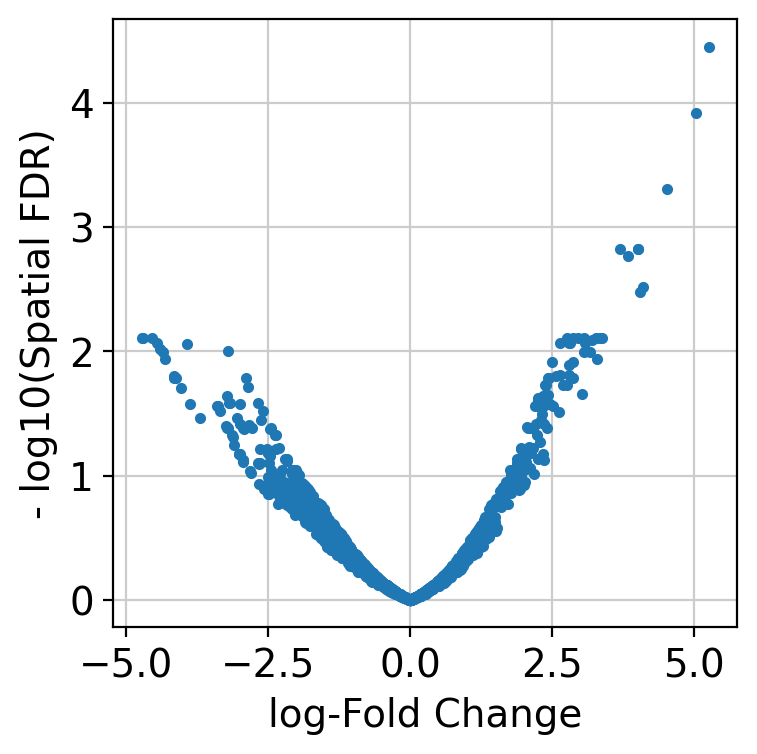

In [21]:
plt.plot(DA_results.logFC, -np.log10(DA_results.SpatialFDR), '.');
plt.xlabel("log-Fold Change");
plt.ylabel("- log10(Spatial FDR)")

In [22]:
%%R
milo <- buildNhoodGraph(milo)

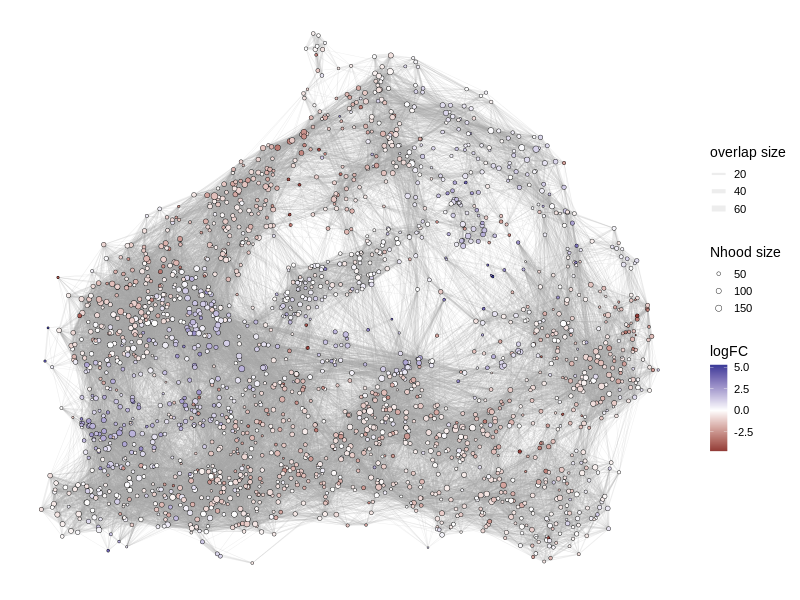

In [23]:
%%R -w 800 -h 600
plotNhoodGraphDA(milo, DA_results, alpha=1)
#ggsave("./figures/milo_APC_neighborhood.pdf")

In [24]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
1,-0.816554,9.279956,0.954089,0.328687,0.609849,1.0,0.607449
2,-0.420838,9.922155,0.366595,0.544870,0.767689,2.0,0.768306
3,-1.083814,9.947461,2.309107,0.128626,0.384352,3.0,0.381074
4,-1.427075,9.537650,3.193794,0.073926,0.288043,4.0,0.283952
5,-0.432370,9.882369,0.377114,0.539155,0.764688,5.0,0.764762
...,...,...,...,...,...,...,...
2139,-1.010991,9.932399,1.999263,0.157384,0.424243,2139.0,0.422563
2140,1.314701,10.309352,3.914007,0.047892,0.235939,2140.0,0.233247
2141,-1.457184,9.662647,3.442569,0.063544,0.268082,2141.0,0.264857
2142,-0.691820,10.353018,1.000010,0.317314,0.599547,2142.0,0.597663


In [25]:
%%R
DA_results <- annotateNhoods(milo, DA_results, coldata_col = "annotation") #### combine with pre-defined cell clusters
#DA_results$cell_states <- ifelse(DA_results$annotation_fraction < 0.7, "Mixed", DA_results$annotation)
head(DA_results)

       logFC   logCPM         F     PValue       FDR Nhood SpatialFDR
1 -0.8165540 9.279956 0.9540890 0.32868678 0.6098492     1  0.6074494
2 -0.4208376 9.922155 0.3665951 0.54486964 0.7676894     2  0.7683059
3 -1.0838136 9.947461 2.3091068 0.12862614 0.3843516     3  0.3810742
4 -1.4270754 9.537650 3.1937941 0.07392612 0.2880430     4  0.2839522
5 -0.4323702 9.882369 0.3771140 0.53915548 0.7646881     5  0.7647623
6 -0.3864185 9.790889 0.2958160 0.58652054 0.7930054     6  0.7927815
  annotation annotation_fraction
1       Mac2           0.8611111
2        LC2           0.9420290
3    MonoMac           1.0000000
4      MoDC2           0.6250000
5    Mig_DC1           0.9076923
6       Mac2           0.9375000


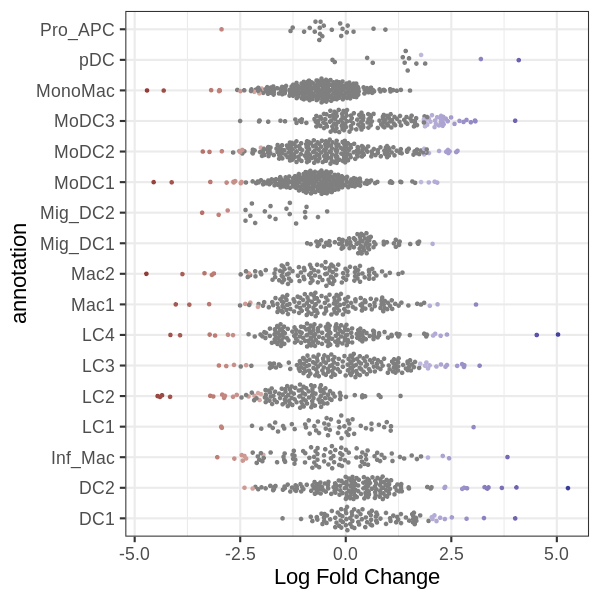

In [26]:
%%R -w 600 -h 600
plotDAbeeswarm(DA_results, group.by = "annotation") ### "cell_states" represents pre-defined/pre-annotated cell clusters

In [77]:
%%R
DA_results$NhoodGroup <- rep('NA',nrow(DA_results))
DA_results$NhoodGroup[which(DA_results$annotation == "MoDC3" &
                        DA_results$logFC > 0 &
                        DA_results$SpatialFDR < 0.1)] <- 'MoDC3_CTCL'
DA_results$NhoodGroup[which(DA_results$annotation == "MoDC3" &
                        DA_results$logFC <= 0)] <- 'MoDC3_Other'
head(DA_results)

       logFC   logCPM         F     PValue       FDR Nhood SpatialFDR
1 -0.8165540 9.279956 0.9540890 0.32868678 0.6098492     1  0.6074494
2 -0.4208376 9.922155 0.3665951 0.54486964 0.7676894     2  0.7683059
3 -1.0838136 9.947461 2.3091068 0.12862614 0.3843516     3  0.3810742
4 -1.4270754 9.537650 3.1937941 0.07392612 0.2880430     4  0.2839522
5 -0.4323702 9.882369 0.3771140 0.53915548 0.7646881     5  0.7647623
6 -0.3864185 9.790889 0.2958160 0.58652054 0.7930054     6  0.7927815
  annotation annotation_fraction NhoodGroup
1       Mac2           0.8611111         NA
2        LC2           0.9420290         NA
3    MonoMac           1.0000000         NA
4      MoDC2           0.6250000         NA
5    Mig_DC1           0.9076923         NA
6       Mac2           0.9375000         NA


In [78]:
%%R
names(assays(milo)) <- 'logcounts'
names(assays(milo))

[1] "logcounts"


In [79]:
%%R
## Find HVGs
dec <- modelGeneVar(milo)
hvgs <- getTopHVGs(dec, n=2000)
head(hvgs)

[1] "CCL22"     "CXCL8"     "G0S2"      "SOD2"      "TXN"       "MTRNR2L12"


In [80]:
%%R
nhood_markers <- findNhoodGroupMarkers(milo, DA_results,subset.row = hvgs,
                                       subset.nhoods = DA_results$NhoodGroup %in% c('MoDC3_CTCL','MoDC3_Other'),
                                       aggregate.samples = TRUE, sample_col = "donor_id")
head(nhood_markers)

  GeneID logFC_MoDC3_Other adj.P.Val_MoDC3_Other logFC_MoDC3_CTCL
1    A2M      -0.137534154             0.1237147      0.137534154
2  ABCA1       0.006905740             0.8774834     -0.006905740
3  ABCA6      -0.003177833             0.8412673      0.003177833
4  ABCC3      -0.032019812             0.3274439      0.032019812
5  ABCC4       0.039799830             0.6533768     -0.039799830
6  ABCE1      -0.016795579             0.7683031      0.016795579
  adj.P.Val_MoDC3_CTCL
1            0.1237147
2            0.8774834
3            0.8412673
4            0.3274439
5            0.6533768
6            0.7683031


In [81]:
%%R
markers <- nhood_markers$GeneID[which(nhood_markers$adj.P.Val_MoDC3_CTCL < 0.1 & nhood_markers$logFC_MoDC3_CTCL > 0)]
markers

 [1] "ACP5"      "ALOX5AP"   "ATOX1"     "BCL2A1"    "BID"       "CCL22"    
 [7] "CD40"      "CD58"      "CD74"      "CKB"       "CREB5"     "CSRP2"    
[13] "CST3"      "CST7"      "CTSZ"      "DNASE1L3"  "ECE1"      "EMP3"     
[19] "GK5"       "GPR160"    "HLA-DPA1"  "HMG20B"    "IGSF8"     "ITM2C"    
[25] "LPXN"      "MAP4K4"    "MCOLN2"    "MFSD12"    "MIR3945HG" "NAAA"     
[31] "NME4"      "PDE4B"     "PLEKHA5"   "PPFIBP1"   "PTP4A3"    "PXDC1"    
[37] "RAB7B"     "REV3L"     "RHOF"      "S100A11"   "SDSL"      "SEMA4A"   
[43] "SESN3"     "SH3BP5"    "TGFA"      "TNFRSF18"  "TRAF4"     "TSPO"     
[49] "TXNRD1"   


In [55]:
%%R
out <- nhood_markers[which(nhood_markers$adj.P.Val_MoDC3_CTCL < 0.1 & nhood_markers$logFC_MoDC3_CTCL > 0), ]
write.table(out, file='MoDC3_DEGs_Milo_final.xls', quote=F, sep='\t', row.names=F)

In [1]:
#%%R
#markers_2 <- c(markers, 'COL9A2','MMP25','SEMA7A','TXNL4A','SLC39A6','PDCD5','ITGB1BP1','UBE2S','CD70')
#plotNhoodExpressionGroups(milo, DA_results, features=markers_2,
#                          subset.nhoods = DA_results$NhoodGroup %in% c('MoDC3_CTCL','MoDC3_Other'), scale=TRUE,
#                          grid.space = "fixed")

In [56]:
%%R -w 700 -h 1200 
library(ggplot2)
#markers <- c('COL9A2','MMP25','SEMA7A','TXNL4A','SLC39A6','PDCD5','ITGB1BP1','UBE2S')
plotNhoodExpressionGroups(milo, DA_results, features=markers,
                          subset.nhoods = DA_results$NhoodGroup %in% c('MoDC3_CTCL','MoDC3_Other'), scale=T,
                          grid.space = "fixed")
ggsave("/home/jovyan/farm/CTCL/script_notebook/figures/milo_MoDC3_DEGs_check_plus_DEGs.3.pdf")